In [16]:
def create_batches(X, y, batch_size):
    for i in range(0, len(X), batch_size):
        yield X[i:i+batch_size], y[i:i+batch_size]

In [17]:
import warnings 
warnings.filterwarnings("ignore")

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

import time

In [18]:
from load_dataset import read_csv_file
df = read_csv_file('creditcardfraud.zip') # provide name of the zip file instead of csv file
df.describe().T # Data Summary

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [19]:
df.duplicated().any
df.duplicated().sum()

1081

In [20]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [21]:
# Taking columns v1 to v28 plus amount and remocing Class
#x= df.iloc[:,1:29] # Remove .values to view data in tabular structure
x= df.iloc[:,:-1].values
x

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

In [22]:
# Considering class as Y attribute
y = df.iloc[:,-1].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
''' 
Zero padding is to make the number of features equal to a power of 2.
it is required for 'amplitude encoding' given below.
'''
num_examples, num_features = x.shape
#print(x_train)
print(num_examples)
print(num_features)

print("Log 2 = ", np.log2(num_features))
print("Ceil = ", np.ceil(np.log2(num_features))) 
n = int(np.ceil(np.log2(num_features)))
dim = 2**n
print(f'(number of qubits, dimension of the Hilbert space) = {(n, dim)}')

zeros = np.zeros((num_examples, dim-num_features))
print("Zeroes = ", len(zeros))
X = np.append(x, zeros, axis=1)
print("X = ", X)
num_examples, num_features = X.shape

num_examples, num_features = X.shape   
print("number of examples = ", num_examples)
print("number of features = ", num_features)

283726
30
Log 2 =  4.906890595608519
Ceil =  5.0
(number of qubits, dimension of the Hilbert space) = (5, 32)
Zeroes =  283726
X =  [[ 0.00000000e+00 -1.35980713e+00 -7.27811733e-02 ...  1.49620000e+02
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.19185711e+00  2.66150712e-01 ...  2.69000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00 -1.35835406e+00 -1.34016307e+00 ...  3.78660000e+02
   0.00000000e+00  0.00000000e+00]
 ...
 [ 1.72788000e+05  1.91956501e+00 -3.01253846e-01 ...  6.78800000e+01
   0.00000000e+00  0.00000000e+00]
 [ 1.72788000e+05 -2.40440050e-01  5.30482513e-01 ...  1.00000000e+01
   0.00000000e+00  0.00000000e+00]
 [ 1.72792000e+05 -5.33412522e-01 -1.89733337e-01 ...  2.17000000e+02
   0.00000000e+00  0.00000000e+00]]
number of examples =  283726
number of features =  32


In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =  train_test_split(X,y, test_size = 0.2, random_state=42)

print("X-train", len(x_train))
print("X-test", len(x_test))
print("Y-train", len(y_train))
print("Y-test", len(y_test))

labels = ['Class 0', 'Class 1']

X-train 226980
X-test 56746
Y-train 226980
Y-test 56746


In [25]:
from qiskit.circuit.library import ZZFeatureMap

num_examples, num_features = x_train.shape
#print(x_train)
print(num_features)

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
#print(feature_map)

#feature_map.decompose().draw(output="mpl", style="clifford", fold=20)

feature_map.decompose().draw(output="text", style="clifford")

32


┌───┐┌─────────────┐                                                »
 q_0: ┤ H ├┤ P(2.0*x[0]) ├───■────────────────────────────────────■────■──»
      ├───┤├─────────────┤ ┌─┴─┐┌──────────────────────────────┐┌─┴─┐  │  »
 q_1: ┤ H ├┤ P(2.0*x[1]) ├─┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├──┼──»
      ├───┤├─────────────┤ └───┘└──────────────────────────────┘└───┘┌─┴─┐»
 q_2: ┤ H ├┤ P(2.0*x[2]) ├───────────────────────────────────────────┤ X ├»
      ├───┤├─────────────┤                                           └───┘»
 q_3: ┤ H ├┤ P(2.0*x[3]) ├────────────────────────────────────────────────»
      ├───┤├─────────────┤                                                »
 q_4: ┤ H ├┤ P(2.0*x[4]) ├────────────────────────────────────────────────»
      ├───┤├─────────────┤                                                »
 q_5: ┤ H ├┤ P(2.0*x[5]) ├────────────────────────────────────────────────»
      ├───┤├─────────────┤                                                »
 q_6: ┤ H ├┤ P(2.0*x[6]) ├────────────────────────────────────────────────»
      ├───┤├─────────────┤                                                »
 q_7: ┤ H ├┤ P(2.0*x[7]) ├────────────────────────────────────────────────»
      ├───┤├─────────────┤                                                »
 q_8: ┤ H ├┤ P(2.0*x[8]) ├────────────────────────────────────────────────»
      ├───┤├─────────────┤                                                »
 q_9: ┤ H ├┤ P(2.0*x[9]) ├────────────────────────────────────────────────»
      ├───┤├─────────────┴┐                                               »
q_10: ┤ H ├┤ P(2.0*x[10]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_11: ┤ H ├┤ P(2.0*x[11]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_12: ┤ H ├┤ P(2.0*x[12]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_13: ┤ H ├┤ P(2.0*x[13]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_14: ┤ H ├┤ P(2.0*x[14]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_15: ┤ H ├┤ P(2.0*x[15]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_16: ┤ H ├┤ P(2.0*x[16]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_17: ┤ H ├┤ P(2.0*x[17]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_18: ┤ H ├┤ P(2.0*x[18]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_19: ┤ H ├┤ P(2.0*x[19]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_20: ┤ H ├┤ P(2.0*x[20]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_21: ┤ H ├┤ P(2.0*x[21]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_22: ┤ H ├┤ P(2.0*x[22]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_23: ┤ H ├┤ P(2.0*x[23]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_24: ┤ H ├┤ P(2.0*x[24]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_25: ┤ H ├┤ P(2.0*x[25]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                           

In [31]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (24, 12)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [27]:
from qiskit_ibm_runtime import QiskitRuntimeService
from apitoken import get_api_token
token = get_api_token()

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token=token
)

service.backends()

backend = service.backend("ibm_brisbane")

In [28]:
from qiskit.circuit.library import RealAmplitudes


'''
For angle encoding, num_qubits = num_features
For amplitude encoding, num_qubits = n = np.log2(num_features)
'''

pqc = RealAmplitudes(num_qubits=n, reps=3)
pqc.decompose().draw()

┌──────────┐                                          ┌──────────┐»
q_0: ┤ Ry(θ[0]) ├──────────────────────────────────■───────┤ Ry(θ[5]) ├»
     ├──────────┤                                ┌─┴─┐     ├──────────┤»
q_1: ┤ Ry(θ[1]) ├──────────────────────■─────────┤ X ├─────┤ Ry(θ[6]) ├»
     ├──────────┤                    ┌─┴─┐    ┌──┴───┴───┐ └──────────┘»
q_2: ┤ Ry(θ[2]) ├──────────■─────────┤ X ├────┤ Ry(θ[7]) ├──────■──────»
     ├──────────┤        ┌─┴─┐    ┌──┴───┴───┐└──────────┘    ┌─┴─┐    »
q_3: ┤ Ry(θ[3]) ├──■─────┤ X ├────┤ Ry(θ[8]) ├─────■──────────┤ X ├────»
     ├──────────┤┌─┴─┐┌──┴───┴───┐└──────────┘   ┌─┴─┐    ┌───┴───┴───┐»
q_4: ┤ Ry(θ[4]) ├┤ X ├┤ Ry(θ[9]) ├───────────────┤ X ├────┤ Ry(θ[14]) ├»
     └──────────┘└───┘└──────────┘               └───┘    └───────────┘»
«                               ┌───────────┐                          »
«q_0: ───────────────────■──────┤ Ry(θ[10]) ├───────────────────■──────»
«                      ┌─┴─┐    ├───────────┤                 ┌─┴─┐    »
«q_1: ──────■──────────┤ X ├────┤ Ry(θ[11]) ├──────■──────────┤ X ├────»
«         ┌─┴─┐    ┌───┴───┴───┐└───────────┘    ┌─┴─┐    ┌───┴───┴───┐»
«q_2: ────┤ X ├────┤ Ry(θ[12]) ├──────■──────────┤ X ├────┤ Ry(θ[17]) ├»
«     ┌───┴───┴───┐└───────────┘    ┌─┴─┐    ┌───┴───┴───┐└───────────┘»
«q_3: ┤ Ry(θ[13]) ├──────■──────────┤ X ├────┤ Ry(θ[18]) ├─────────────»
«     └───────────┘    ┌─┴─┐    ┌───┴───┴───┐└───────────┘             »
«q_4: ─────────────────┤ X ├────┤ Ry(θ[19]) ├──────────────────────────»
«                      └───┘    └───────────┘                          »
«     ┌───────────┐
«q_0: ┤ Ry(θ[15]) ├
«     ├───────────┤
«q_1: ┤ Ry(θ[16]) ├
«     └───────────┘
«q_2: ─────────────
«                  
«q_3: ─────────────
«                  
«q_4: ─────────────
«

In [29]:
from qiskit_machine_learning.circuit.library import RawFeatureVector

print("Num features :", num_features)

fm = RawFeatureVector(feature_dimension=num_features) 
fm.draw() 

Num features : 32


»
q_0: »
     »
q_1: »
     »
q_2: »
     »
q_3: »
     »
q_4: »
     »
«     ┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
«q_0: ┤0                                                                                                                                                                                                                ├
«     │                                                                                                                                                                                                                 │
«q_1: ┤1                                                                                                                                                                                                                ├
«     │                                                                                                                                                                                                                 │
«q_2: ┤2 Parameterizedinitialize(x[0],x[1],x[2],x[3],x[4],x[5],x[6],x[7],x[8],x[9],x[10],x[11],x[12],x[13],x[14],x[15],x[16],x[17],x[18],x[19],x[20],x[21],x[22],x[23],x[24],x[25],x[26],x[27],x[28],x[29],x[30],x[31]) ├
«     │                                                                                                                                                                                                                 │
«q_3: ┤3                                                                                                                                                                                                                ├
«     │                                                                                                                                                                                                                 │
«q_4: ┤4                                                                                                                                                                                                                ├
«     └─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

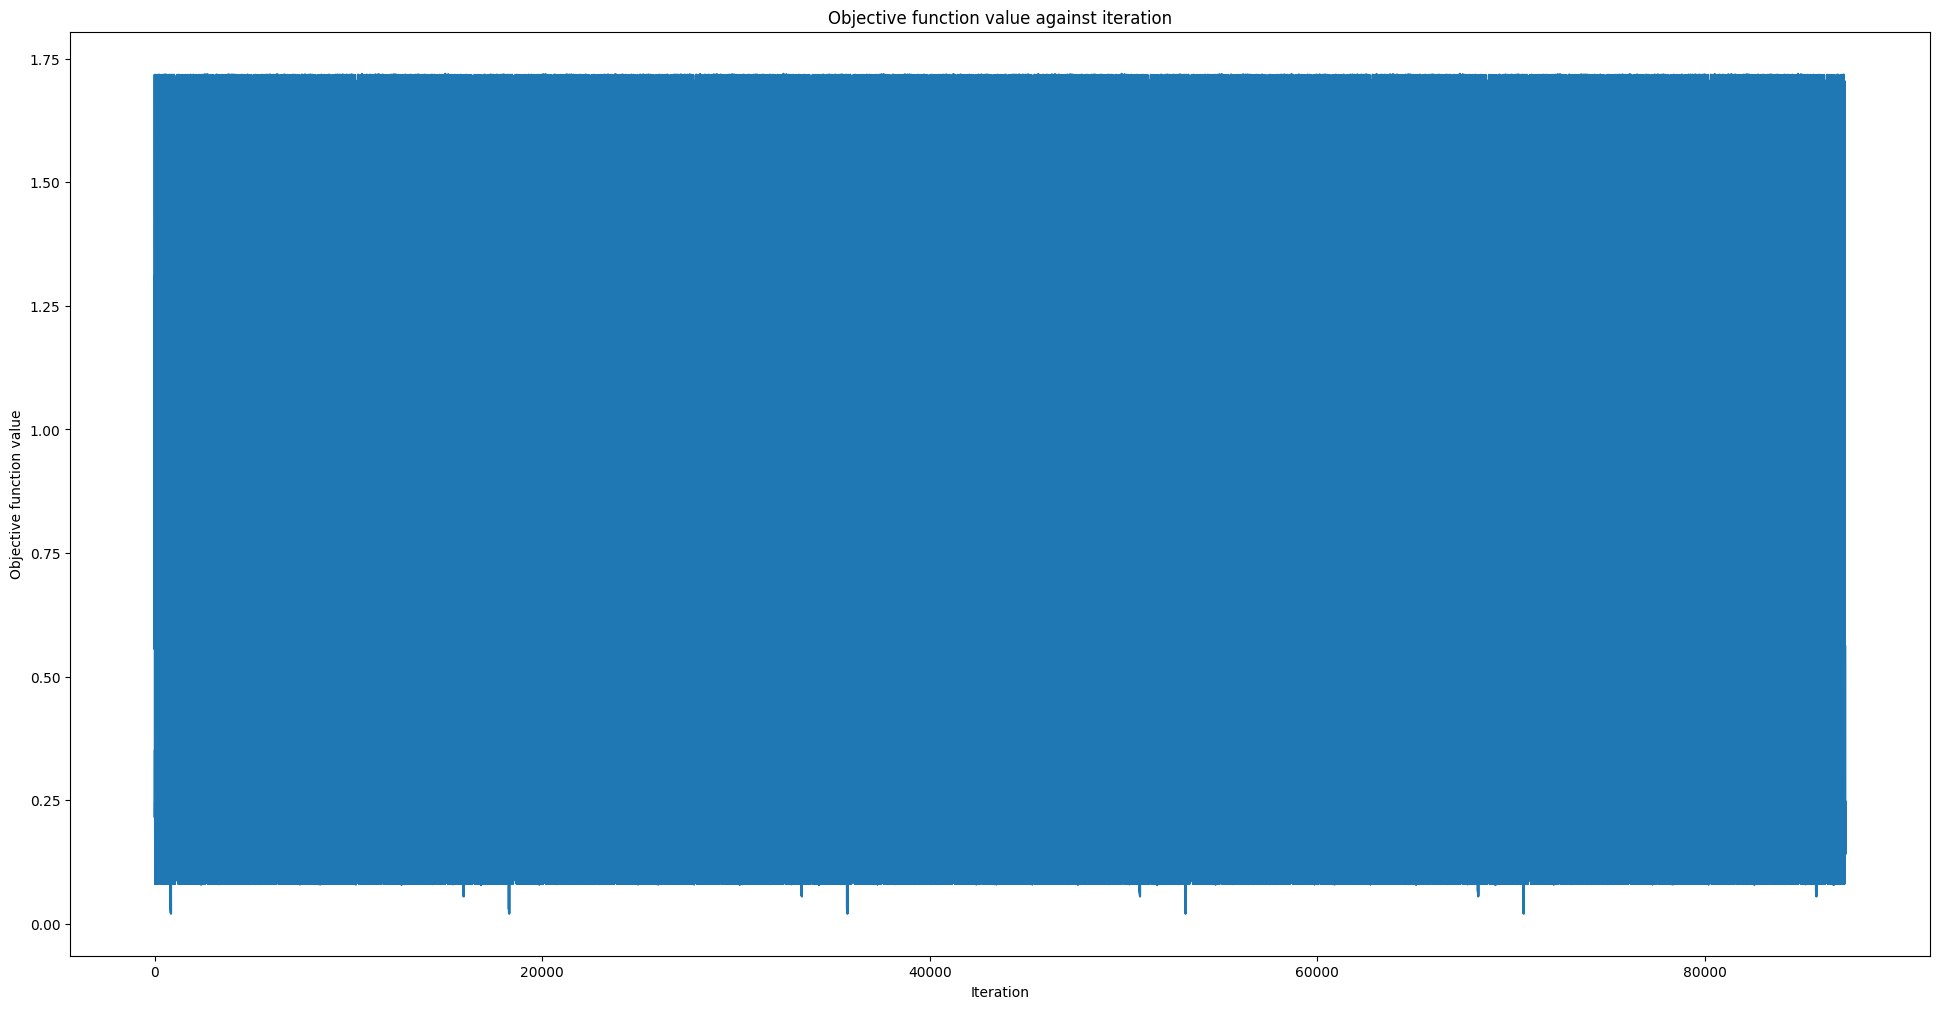

Epoch 5/5, Batch 349, Time: 79.97s
X_batch shape: (100, 32), y_batch shape: (100,)
Error in batch 349: 'The shape of the targets does not match the shape of neural network output.'
X_batch shape: (80, 32), y_batch shape: (80,)
Error in batch 349: 'The shape of the targets does not match the shape of neural network output.'
Error while scoring after epoch 5: 'The model has not been fitted yet'
Total training time: 206554.94 seconds


In [32]:
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler
import time

# Define batch size and number of epochs
batch_size = 100
num_epochs = 5

optimizer = COBYLA(maxiter=50)  # Reduced maxiter for quicker batch iterations
sampler = Sampler()

vqc = VQC(
    sampler=sampler,
    feature_map=fm,
    ansatz=pqc,
    optimizer=optimizer,
    callback=callback_graph,
)
model_fitted = False  # Flag to check if model has been fitted

# Training loop
start_time = time.time()
for epoch in range(num_epochs):
    batch_num = 0
    for X_batch, y_batch in create_batches(x_train, y_train, batch_size):
        batch_start = time.time()
         # Debugging: Print shapes of batches
        print(f"X_batch shape: {X_batch.shape}, y_batch shape: {y_batch.shape}")

        # Check for empty batches
        if X_batch.size == 0 or y_batch.size == 0:
            print(f"Skipping empty batch {batch_num}")
            continue

        try:
            vqc.fit(X_batch, y_batch)
            model_fitted = True
        except Exception as e:
            print(f"Error in batch {batch_num}: {e}")
            continue

        batch_end = time.time()
        
        # Print progress
        batch_num += 1
        print(f"Epoch {epoch+1}/{num_epochs}, Batch {batch_num}, Time: {batch_end - batch_start:.2f}s")
        
        # Optionally, you can evaluate on a validation set here
        # val_score = vqc.score(X_val, y_val)
        # print(f"Validation Score: {val_score}")

    # Optionally, evaluate on the full training set after each epoch
   # train_score = vqc.score(x_train, y_train)
    #print(f"Epoch {epoch+1}/{num_epochs} completed. Training Score: {train_score}")

if model_fitted:
    try:
        train_score = vqc.score(x_train, y_train)
        print(f"Epoch {epoch+1}/{num_epochs} completed. Training Score: {train_score}")
    except Exception as e:
        print(f"Error while scoring after epoch {epoch+1}: {e}")
else:
    print(f"Model has not been fitted successfully in epoch {epoch+1}")

end_time = time.time()
print(f"Total training time: {end_time - start_time:.2f} seconds")

In [34]:
# Prediction after training
if model_fitted:
    try:
        y_train_pred = vqc.predict(x_train)
        y_test_pred = vqc.predict(x_test)

        print(classification_report(y_train, y_train_pred))
        print(confusion_matrix(y_train, y_train_pred), "= confusion matrix for train set \n")

        print(classification_report(y_test, y_test_pred))
        print(confusion_matrix(y_test, y_test_pred), "= confusion matrix for test set \n ")
        print(round(roc_auc_score(y_test, y_test_pred), 2), "= roc_auc_score for test set \n")
    except Exception as e:
        print(f"Error during prediction: {e}")
else:
    print("Model was not fitted successfully, skipping prediction.")

Error during prediction: 'The model has not been fitted yet'


In [35]:
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler
import numpy as np
import time
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Define batch size and number of epochs
batch_size = 100
num_epochs = 5

optimizer = COBYLA(maxiter=50)  # Reduced maxiter for quicker batch iterations
sampler = Sampler()

# Assuming fm and pqc are predefined
# fm = ...
# pqc = ...

vqc = VQC(
    sampler=sampler,
    feature_map=fm,
    ansatz=pqc,
    optimizer=optimizer,
    callback=callback_graph,
)

# Function to create batches (dummy function, replace with actual implementation)
def create_batches(X, y, batch_size):
    for i in range(0, len(X), batch_size):
        yield X[i:i + batch_size], y[i:i + batch_size]

# Training loop
start_time = time.time()
model_fitted = False  # Flag to check if model has been fitted

for epoch in range(num_epochs):
    batch_num = 0
    for X_batch, y_batch in create_batches(x_train, y_train, batch_size):
        batch_start = time.time()

        # Debugging: Print shapes of batches
        print(f"X_batch shape: {X_batch.shape}, y_batch shape: {y_batch.shape}")

        # Check for empty batches
        if X_batch.size == 0 or y_batch.size == 0:
            print(f"Skipping empty batch {batch_num}")
            continue

        # Ensure y_batch shape matches expected output shape
        if len(y_batch.shape) == 1:
            y_batch = y_batch.reshape(-1, 1)
        print(f"Reshaped y_batch shape: {y_batch.shape}")

        try:
            vqc.fit(X_batch, y_batch)
            model_fitted = True  # Set flag to True if fit completes successfully
        except Exception as e:
            print(f"Error in batch {batch_num}: {e}")
            continue

        # Evaluate on the same batch to check fitting status
        try:
            val_score = vqc.score(X_batch, y_batch)
            print(f"Validation Score for Batch {batch_num}: {val_score}")
        except Exception as e:
            print(f"Error during validation for Batch {batch_num}: {e}")

        batch_end = time.time()
        
        # Print progress
        batch_num += 1
        print(f"Epoch {epoch+1}/{num_epochs}, Batch {batch_num}, Time: {batch_end - batch_start:.2f}s")
        
        # Optionally, you can evaluate on a validation set here
        # val_score = vqc.score(X_val, y_val)
        # print(f"Validation Score: {val_score}")

    # Optionally, evaluate on the full training set after each epoch
    if model_fitted:
        try:
            train_score = vqc.score(x_train, y_train)
            print(f"Epoch {epoch+1}/{num_epochs} completed. Training Score: {train_score}")
        except Exception as e:
            print(f"Error while scoring after epoch {epoch+1}: {e}")
    else:
        print(f"Model has not been fitted successfully in epoch {epoch+1}")

end_time = time.time()
print(f"Total training time: {end_time - start_time:.2f} seconds")

# Prediction after training
if model_fitted:
    try:
        y_train_pred = vqc.predict(x_train)
        y_test_pred = vqc.predict(x_test)

        print(classification_report(y_train, y_train_pred))
        print(confusion_matrix(y_train, y_train_pred), "= confusion matrix for train set \n")

        print(classification_report(y_test, y_test_pred))
        print(confusion_matrix(y_test, y_test_pred), "= confusion matrix for test set \n ")
        print(round(roc_auc_score(y_test, y_test_pred), 2), "= roc_auc_score for test set \n")
    except Exception as e:
        print(f"Error during prediction: {e}")
else:
    print("Model was not fitted successfully, skipping prediction.")


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "d:\CodingPlayground\Quantum\creditcard_fraud_detection\.venv\Lib\site-packages\IPython\core\formatters.py", line 226, in catch_format_error
    r = method(self, *args, **kwargs)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\CodingPlayground\Quantum\creditcard_fraud_detection\.venv\Lib\site-packages\IPython\core\formatters.py", line 343, in __call__
    return printer(obj)
           ^^^^^^^^^^^^
  File "d:\CodingPlayground\Quantum\creditcard_fraud_detection\.venv\Lib\site-packages\IPython\core\pylabtools.py", line 170, in print_figure
    fig.canvas.print_figure(bytes_io, **kw)
  File "d:\CodingPlayground\Quantum\creditcard_fraud_detection\.venv\Lib\site-packages\matplotlib\backend_bases.py", line 2218, in print_figure
    result = print_method(
             ^^^^^^^^^^^^^
  File "d:\CodingPlayground\Quantum\creditcard_fraud_detection\.venv\Lib\site-packages\matplotlib\backend_bases.py", line 2068, in <lambda>
    print_method = functools.wr

<Figure size 2400x1200 with 1 Axes>

: 